In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import os
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
def plot_median_quantiles(x, y, color, label):
    plt.fill_between(x, np.quantile(y, q=0.25, axis=0), np.quantile(y, q=0.75, axis=0), facecolor=color, alpha=0.25)
    plt.plot(x, np.median(y, axis=0), c=color, label=label)

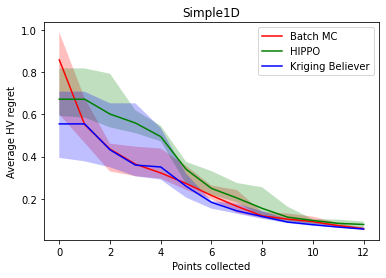

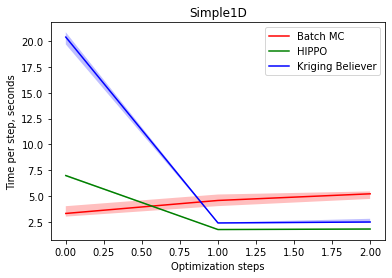

In [11]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 3

# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plt.title("Simple1D")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()

# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plt.title("Simple1D")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
plt.show()

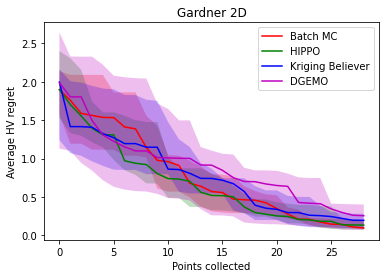

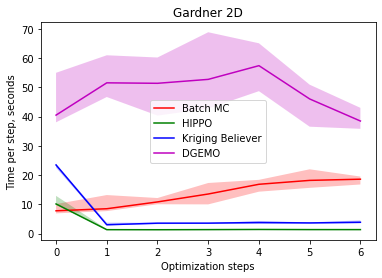

In [21]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_gardner_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/DistanceBased_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_gardner_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 7

# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_hv_regret, 'm', 'DGEMO')
plt.title("Gardner 2D")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()

# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("Gardner 2D")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
plt.show()

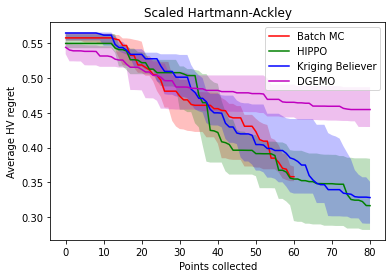

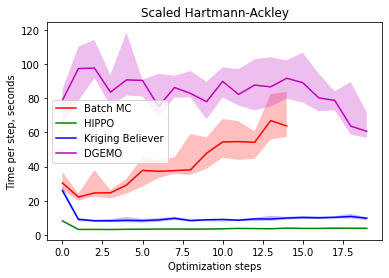

In [23]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_15_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_ha_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_15_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_ha_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 20


# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x[:15*n_query_points+1], batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_hv_regret, 'm', 'DGEMO')
plt.title("Scaled Hartmann-Ackley")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()


# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x[:15], batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("Scaled Hartmann-Ackley")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
plt.show()

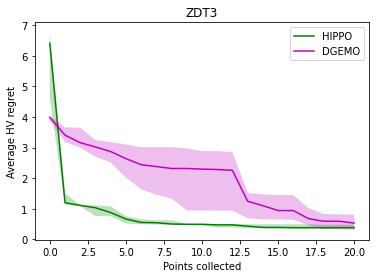

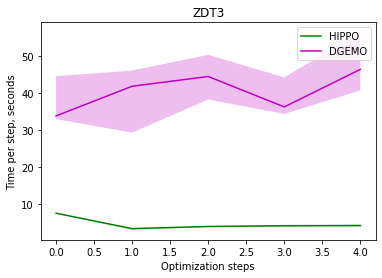

In [14]:
# This stopped working for some reason for both Batch MC and KB
# They keep failing with Cholesky errors very early into the optimization

# batch_mc_hv_regret = np.loadtxt("results/BatchMC_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_zdt3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")
# kb_hv_regret = np.loadtxt("results/KB_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")

# batch_mc_time = np.loadtxt("results/BatchMC_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_zdt3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")
# kb_time = np.loadtxt("results/KB_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 5


# regret
x = range(n_query_points * n_optimization_steps + 1)

# plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, dgemo_hv_regret, 'm', 'DGEMO')
# plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plt.title("ZDT3")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()


# time per step
x = range(n_optimization_steps)

# plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
# plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plt.title("ZDT3")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
plt.show()

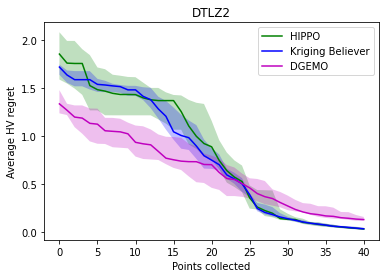

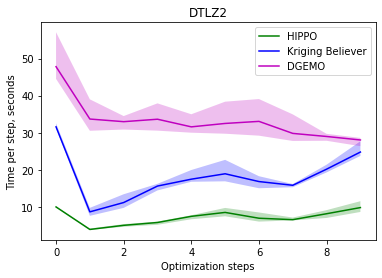

In [15]:
hippo_hv_regret = np.loadtxt("results/HIPPO_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
dgemo_regret = np.loadtxt("results/DGEMO_dtlz2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")

hippo_time = np.loadtxt("results/HIPPO_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_dtlz2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 10


# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_regret, 'm', 'DGEMO')
plt.title("DTLZ2")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()


# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("DTLZ2")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
plt.show()

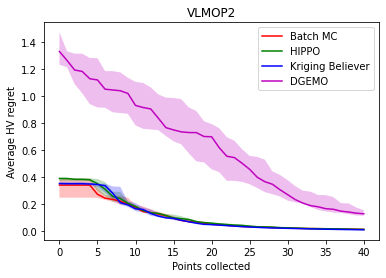

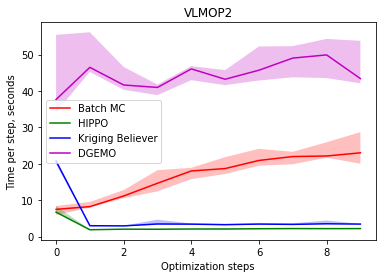

In [16]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_vlmop2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_vlmop2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 10



# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_regret, 'm', 'DGEMO')
plt.title("VLMOP2")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()


# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("VLMOP2")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
plt.show()

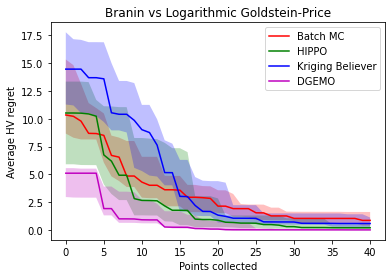

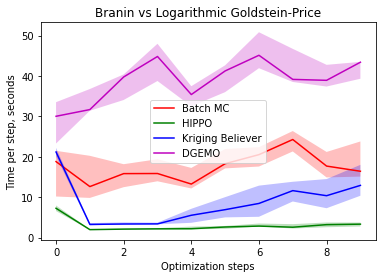

In [17]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_bgp_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_3_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_bgp_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_3_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 10



# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_hv_regret, 'm', 'DGEMO')
plt.title("Branin vs Logarithmic Goldstein-Price")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()


# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("Branin vs Logarithmic Goldstein-Price")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
plt.show()

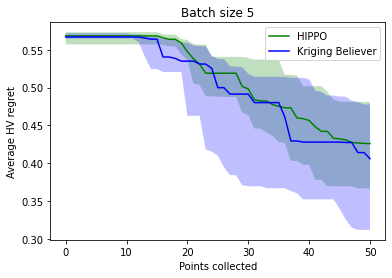

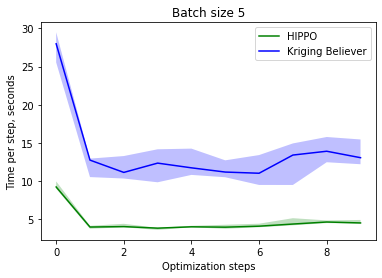

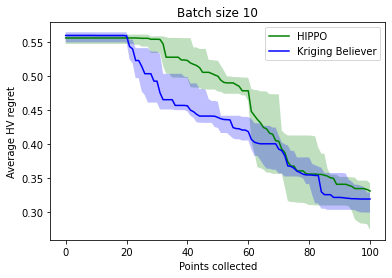

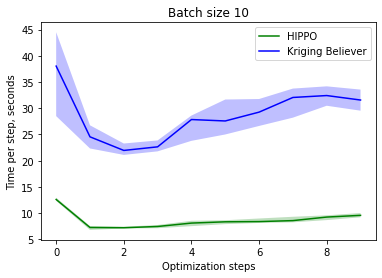

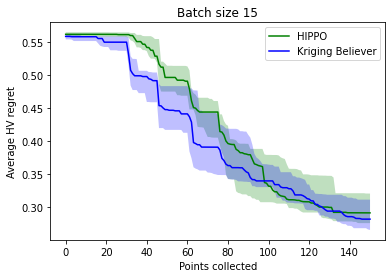

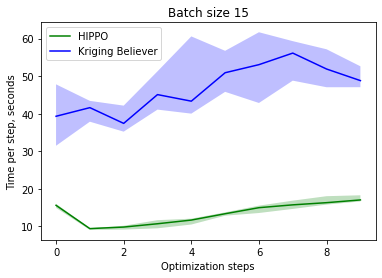

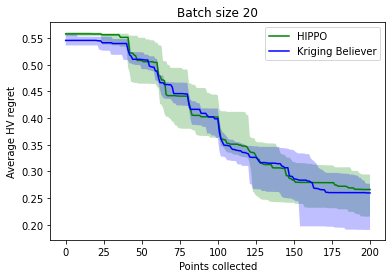

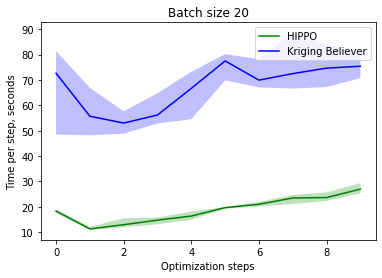

In [19]:
batch_sizes = [5, 10, 15, 20]

for batch_size in batch_sizes:
    hippo_hv_regret = np.loadtxt(f"results/batch-size-expHIPPO_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_{batch_size}_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
    kb_hv_regret = np.loadtxt(f"results/batch-size-expKB_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_{batch_size}_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")

    hippo_time = np.loadtxt(f"results/batch-size-expHIPPO_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_{batch_size}_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
    kb_time = np.loadtxt(f"results/batch-size-expKB_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_{batch_size}_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")

    n_query_points = batch_size
    n_optimization_steps = 10



    # regret
    x = range(n_query_points * n_optimization_steps + 1)

    plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
    plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
    plt.title(f"Batch size {batch_size}")
    plt.xlabel("Points collected")
    plt.ylabel("Average HV regret")
    plt.legend()
    plt.show()


    # time per step
    x = range(n_optimization_steps)

    plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
    plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
    plt.title(f"Batch size {batch_size}")
    plt.xlabel("Optimization steps")
    plt.ylabel("Time per step, seconds")
    plt.legend()
    plt.show()